In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from matplotlib import pyplot as plt
import numpy as np
import random

In [5]:
x_train = np.loadtxt('input.csv',delimiter=',');
y_train = np.loadtxt('labels.csv',delimiter=',');
x_test = np.loadtxt('input_test.csv',delimiter=',');
y_test = np.loadtxt('labels_test.csv',delimiter=',');

In [6]:
print("Shape of X_train : ",x_train.shape)
print("Shape of Y_train : ",y_train.shape)

Shape of X_train :  (2000, 30000)
Shape of Y_train :  (2000,)


In [7]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)
x_test = x_test.reshape(len(x_test), 100,100,3)
y_test = y_test.reshape(len(y_test), 1)
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
print("Shape of X_train : ",x_train.shape)
print("Shape of Y_train : ",y_train.shape)
print("Shape of X_test : ",x_test.shape)
print("Shape of Y_test : ",y_test.shape)

Shape of X_train :  (2000, 100, 100, 3)
Shape of Y_train :  (2000, 1)
Shape of X_test :  (400, 100, 100, 3)
Shape of Y_test :  (400, 1)


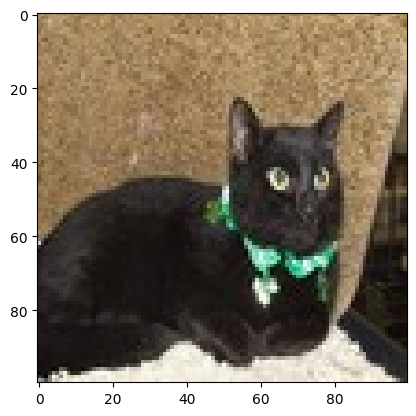

In [9]:
idx=random.randint (0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()


In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(100,100,3)))
model.add( MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add( MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid' ))

In [11]:
model.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [13]:
H=model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),batch_size=64)

Epoch 1/5
32/32 [==============================] - 25s 724ms/step - loss: 0.6938 - accuracy: 0.5070 - val_loss: 0.6879 - val_accuracy: 0.5075
Epoch 2/5
32/32 [==============================] - 21s 665ms/step - loss: 0.6886 - accuracy: 0.5480 - val_loss: 0.6867 - val_accuracy: 0.5100
Epoch 3/5
32/32 [==============================] - 21s 651ms/step - loss: 0.6837 - accuracy: 0.5540 - val_loss: 0.6924 - val_accuracy: 0.5025
Epoch 4/5
32/32 [==============================] - 20s 639ms/step - loss: 0.6807 - accuracy: 0.5615 - val_loss: 0.6794 - val_accuracy: 0.5200
Epoch 5/5
32/32 [==============================] - 21s 642ms/step - loss: 0.6786 - accuracy: 0.5730 - val_loss: 0.6846 - val_accuracy: 0.5075


In [14]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 113ms/step - loss: 0.6846 - accuracy: 0.5075


[0.6845552921295166, 0.5074999928474426]

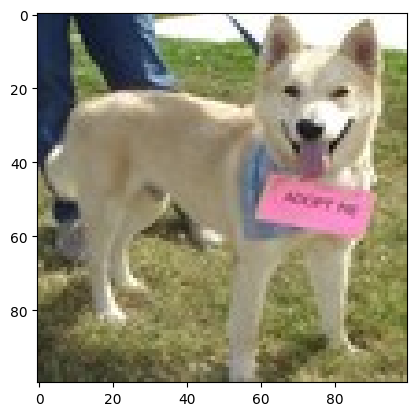

1/1 [==============================] - 0s 165ms/step
Our model says that it's a  dog


In [15]:
idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
 pred = 'dog'
else:
 pred = 'cat'
print("Our model says that it's a ",pred)

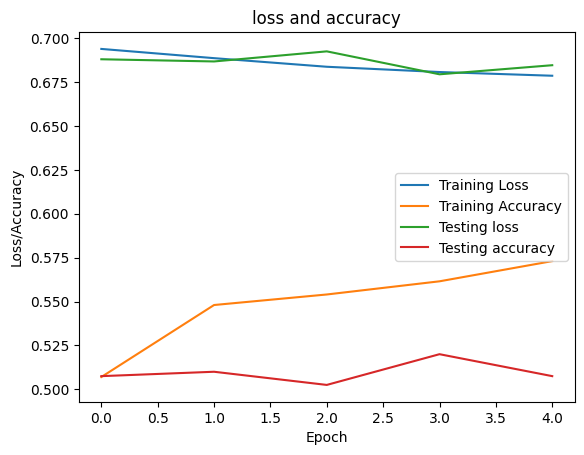

In [16]:
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_loss'])
plt.plot(H.history['val_accuracy'])
plt.title('loss and accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Training Accuracy','Testing loss','Testing accuracy'])
plt.show()